<a href="https://colab.research.google.com/github/apoorvkh/notebooks/blob/main/Faster%20R-CNN%20Detections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [ ]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# Loading Model

In [ ]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

import torch, torchvision
from torchvision import transforms
from PIL import Image
import numpy as np
import cv2

CTX = torch.device('cuda')
box_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
box_model.to(CTX)
box_model.eval()

In [7]:
def load_image(image_path):
    return cv2.imread(image_path, 1)

def transform_image(img):
    pil_image = Image.fromarray(img)
    transform = transforms.Compose([transforms.ToTensor()])
    transformed_img = transform(pil_image)
    return transformed_img

def get_detections(model, input, threshold=0.5):
    pred = model([input.to(CTX)])

    pred_boxes = [[(i[0], i[1]), (i[2], i[3])]
                  for i in list(pred[0]['boxes'].cpu().detach().numpy())]
    pred_classes = [COCO_INSTANCE_CATEGORY_NAMES[i]
                    for i in list(pred[0]['labels'].cpu().numpy())]
    pred_scores = list(pred[0]['scores'].cpu().detach().numpy())

    pred_boxes = [bb for i, bb in enumerate(pred_boxes) if pred_scores[i] >= threshold]
    pred_classes = [c for i, c in enumerate(pred_classes) if pred_scores[i] >= threshold]
    pred_scores = [s for i, s in enumerate(pred_scores) if pred_scores[i] >= threshold]

    return pred_boxes, pred_classes, pred_scores

# Inference

In [8]:
# Sample from MS COCO
!curl -o demo.jpg https://farm6.staticflickr.com/5183/5619918180_0b11e6a97d_z.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  112k    0  112k    0     0  1060k      0 --:--:-- --:--:-- --:--:-- 1050k


In [15]:
image = load_image('demo.jpg')
input = transform_image(image)
boxes, classes, scores = get_detections(box_model, input, threshold=0.5)

print(len(boxes), len(classes), len(scores))

print(boxes[0], classes[0], scores[0])

16 16 16
[(261.02048, 189.27444), (358.29816, 365.48047)] backpack 0.9965738


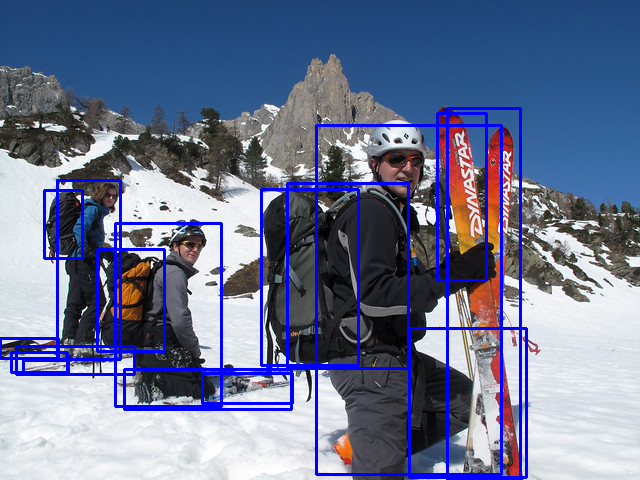

In [16]:
from google.colab.patches import cv2_imshow

for box, label in zip(boxes, classes):
    cv2.rectangle(image, box[0], box[1], (255, 0, 0), 2)

cv2_imshow(image)